
# Introduction to Matrices in Python

This notebook introduces how to work with matrices using **NumPy**, the core numerical computing library in Python.
We'll cover:
- Creating and displaying matrices  
- Indexing and slicing  
- Basic arithmetic and matrix multiplication
- Solving linear systems


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mtrl-ubc/mtrl361/blob/main/getting-started/matrix_examples.ipynb)

In [62]:
import numpy as np

## 1. Creating Matrices
Python does not have a built-in matrix type, but NumPy provides powerful support for arrays and matrices.
Usually, we use `numpy.array` to create matrices. There are also specialized functions like `numpy.zeros`, `numpy.ones`, and `numpy.eye` for creating specific types of matrices like zero matrices and identity matrices. These are objects of the `ndarray` class in NumPy and have many built-in methods for matrix operations. More information can be found in the [NumPy documentation](https://numpy.org/doc/stable/user/basics.html).

Similar to MATLAB, we can create matrices using nested lists in square brackets as shown below.

*Remember in Python, rows are separated by commas, and each row is enclosed in its own set of square brackets.*



In [63]:

# Create a 2x2 matrix
A = np.array([[1, 2],
              [3, 4]])
print("Matrix A:\n", A)

# Create a 3x3 matrix of zeros
B = np.zeros((3, 3))
print("\nMatrix B (zeros):\n", B)

# Create a 3x3 identity matrix
I = np.eye(3)
print("\nIdentity Matrix I:\n", I)


Matrix A:
 [[1 2]
 [3 4]]

Matrix B (zeros):
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Identity Matrix I:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 2. Accessing Elements
Unlike MATLAB which uses 1-based indexing, Python uses 0-based indexing. This means the first element is accessed with index 0. To access elements, we use square brackets with row and column indices separated by a comma.
To access entire rows or columns, we can use the colon `:` operator. Remember that slicing in Python is exclusive of the endpoint.
Negative indices can be used to access elements from the end of the array.

In [64]:

# Access elements
print("A[1, 0] =", A[1, 0])    # Element at row=1, col=0
print("Row 0 of A:", A[0])      # First row
print("Column 1 of A:", A[:, 1]) # Second column


print("Last element of A:", A[-1, -1])  # Last element
print("Last row of A:", A[-1])      # Last row

# To extract the top left 2x2 submatrix for the 3x3 identity matrix I
sub_I = I[0:2, 0:2]
print("\nTop-left 2x2 submatrix of I:\n", sub_I)


A[1, 0] = 3
Row 0 of A: [1 2]
Column 1 of A: [2 4]
Last element of A: 4
Last row of A: [3 4]

Top-left 2x2 submatrix of I:
 [[1. 0.]
 [0. 1.]]


Iterating through rows and columns can be done using loops.

In [65]:
# Use the shape attribute to get number of rows and columns
rows, cols = A.shape
# Iterate through rows
print("\nIterating through rows of A:")
for i in range(rows):
    print(f"Row {i}: {A[i, :]}")
# Iterate through columns
print("\nIterating through columns of A:")
for j in range(cols):
    print(f"Column {j}: {A[:, j]}")

# Iterate through each element
print("\nIterating through each element of A:")
for i in range(rows):
    for j in range(cols):
        print(f"A[{i}, {j}] = {A[i, j]}")

# Iterate over diagonal elements
print("\nDiagonal elements of A:")
for i in range(rows):
    print(f"A[{i}, {i}] = {A[i, i]}")

# Try changing all elements to zero


Iterating through rows of A:
Row 0: [1 2]
Row 1: [3 4]

Iterating through columns of A:
Column 0: [1 3]
Column 1: [2 4]

Iterating through each element of A:
A[0, 0] = 1
A[0, 1] = 2
A[1, 0] = 3
A[1, 1] = 4

Diagonal elements of A:
A[0, 0] = 1
A[1, 1] = 4


## 3. Basic Matrix Operations
- Matrix addition, scalar multiplication, and element-wise multiplication can be performed using standard operators.
- Scalar operations apply to each element of the matrix: useful if you want to set an initial condition for your temperature distribution in a heat transfer problem, for example.
- Element-wise multiplication is done using the `*` operator. This allows you to multiply corresponding elements of two matrices of the same size.

In [66]:

C = np.array([[5, 6],
              [7, 8]])

# Matrix addition
print("Matrix Addition (A + C):\n", A + C)

# Scalar multiplication
print("\nScalar Multiplication (2 * A):\n", 2 * A)

# Element-wise multiplication
print("\nElement-wise Multiplication (A * C):\n", A * C)


Matrix Addition (A + C):
 [[ 6  8]
 [10 12]]

Scalar Multiplication (2 * A):
 [[2 4]
 [6 8]]

Element-wise Multiplication (A * C):
 [[ 5 12]
 [21 32]]


## 4. Matrix Multiplication
Matrix multiplication is performed using the `@` operator or the `numpy.dot()` function. This operation follows the rules of linear algebra, where the number of columns in the first matrix must equal the number of rows in the second matrix.

In [67]:

# Using @ operator for matrix multiplication
F = A @ C
print("Matrix Multiplication (A @ C):\n", F)

# Or equivalently:
print("\nUsing np.dot(A, C):\n", np.dot(A, C))

F = C/A
print("\nMatrix Division (A / C):\n", A/C)

Matrix Multiplication (A @ C):
 [[19 22]
 [43 50]]

Using np.dot(A, C):
 [[19 22]
 [43 50]]

Matrix Division (A / C):
 [[0.2        0.33333333]
 [0.42857143 0.5       ]]


## 5. Transpose
The transpose of a matrix is obtained using the `.T` attribute.

In [68]:
A_T = A.T
print("Transpose of A:\n", A_T)
# The inverse of a matrix can be computed using numpy.linalg.inv()
A_inv = np.linalg.inv(A)
print("\nInverse of A:\n", A_inv)

F = C @ A_inv
print("\nMatrix Multiplication (C @ A_inv):\n", F)

Transpose of A:
 [[1 3]
 [2 4]]

Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]

Matrix Multiplication (C @ A_inv):
 [[-1.  2.]
 [-2.  3.]]


## 6. Solving Linear Systems
NumPy provides a convenient function `numpy.linalg.solve()` to solve systems of linear equations of the form Ax = b, where A is a matrix and b is a vector.
More information can be found in the [NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).

Remember the documentation is your friend!

In [69]:

# Solve Ax = b for x
b = np.array([5, 6])
x = np.linalg.solve(A, b)
print("Solution of Ax = b:", x)

# Verify solution


Solution of Ax = b: [-4.   4.5]
Check A @ x = [5. 6.]


## 7. Plotting Matrices
We can visualize matrices using libraries like Matplotlib. Let us start by plotting a row of a matrix.

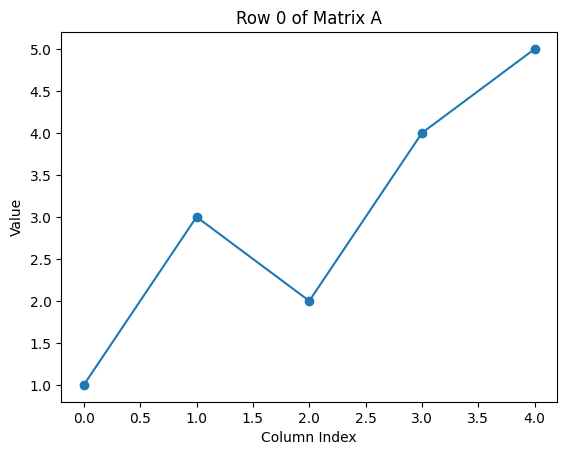

In [70]:
import  matplotlib.pyplot as plt

# Let's create a new matrix A for plotting
J = np.array([[1, 3, 2, 4, 5],
                [5, 4, 3, 2, 1],
                [2, 3, 4, 5, 6]])

# Plot a row of matrix A
plt.plot(J[0, :], marker='o')
plt.title('Row 0 of Matrix A')
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.show()

# How would you plot a column of a matrix?
# How would you plot all rows of a matrix on the same graph?
